In [5]:
import pandas as pd
import scipy.io as sio
import numpy as np
from matplotlib import pyplot as plt
import seaborn
from IPython.core.display import display
%matplotlib inline

In [2]:
df = pd.read_pickle('../testData/scrobbles_test/10000074.pkl')
# Y1 = sio.loadmat('/Users/jaredlorince/Downloads/tSNE_matlab/{}.mat'.format('result_10000'))['result']
# Y1 = sio.loadmat('/Users/jaredlorince/Downloads/tSNE_matlab/{}.mat'.format('result_20k'))['result']
# Y2 = np.load('/Users/jaredlorince/Downloads/tsne_test_10000.npy')
Y3 = np.loadtxt('/Users/jaredlorince/git/lib/bhtsne/output_normed',delimiter='\t')

In [8]:
display(df.head())


,artist_id,ts,td,artist_idx,features,dist,session,patch_idx_shuffle,patch_idx_simple,block
0,810,2008-03-29 20:12:38,-9.223372e+09,1112.0,"[2.15221003274e-06, 0.00210297822824, 4.483770...",NaN,0,0,0,0
1,810,2008-03-29 20:16:19,2.210000e+02,1112.0,"[2.15221003274e-06, 0.00210297822824, 4.483770...",0.0,0,0,0,0
2,810,2008-03-29 20:19:49,2.100000e+02,1112.0,"[2.15221003274e-06, 0.00210297822824, 4.483770...",0.0,0,0,0,0
3,810,2008-03-29 20:23:21,2.120000e+02,1112.0,"[2.15221003274e-06, 0.00210297822824, 4.483770...",0.0,0,0,0,0
4,810,2008-03-29 20:27:42,2.610000e+02,1112.0,"[2.15221003274e-06, 0.00210297822824, 4.483770...",0.0,0,0,0,0


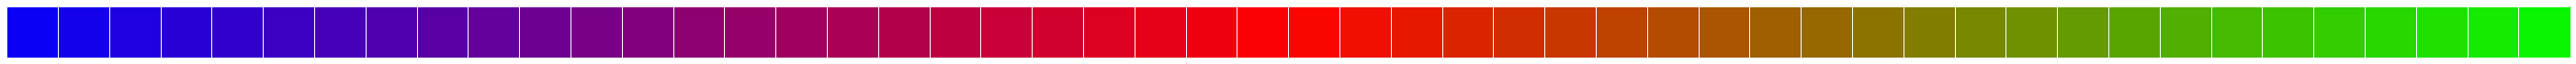

In [36]:
seaborn.palplot(seaborn.color_palette("brg",mx))

In [122]:
def srter(row):
    a,b = row['prev'],row['artist_idx'],
    if b<a:
        a = row['artist_idx']
        b = row['prev']
    return pd.Series({'a':a,'b':b})
df['prev'] = df['artist_idx'].shift(1)
df = pd.concat([df,df.apply(srter,axis=1)],axis=1)          
jumps = df.groupby(['a','b']).count()['block'].reset_index()
coords = pd.DataFrame(Y3).reindex(range(112312))
jumps = jumps.join(coords,on='a').join(coords,on='b',rsuffix='_prev')
jumps[jumps['a']!=jumps['b']]['block'].describe()
colors = seaborn.color_palette("brg",mx)
jumps['c'] = jumps.apply(lambda row: colors[int(row['block']-1)] if row['a'] != row['b'] else np.nan, axis=1)

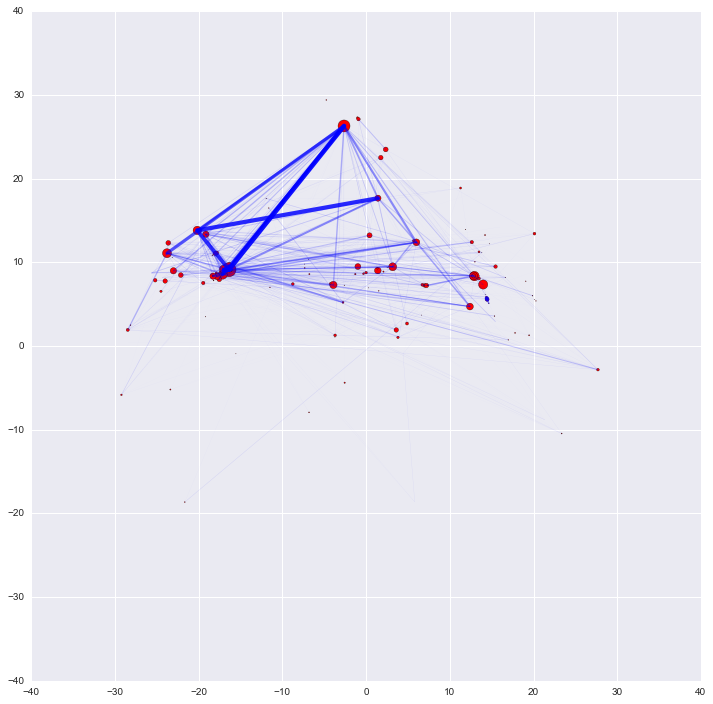

In [123]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
mx = jumps[jumps['a']!=jumps['b']]['block'].max()
for row in jumps.dropna().sort_values(by='block').iterrows():
    row = row[1]
    ax.plot([row['0_prev'],row['0']],[row['1_prev'],row['1']],c='blue',alpha=row['block']/float(mx),lw=5*(row['block']/float(mx)))
self_jumps = jumps[jumps['a']==jumps['b']]
self_jump_mx = self_jumps['block'].max()
ax.scatter(x=self_jumps['0'],y=self_jumps['1'],s=200*(self_jumps['block']/self_jump_mx),c='red')
# ax.set_xlim(-150,150);
# ax.set_ylim(-150,150);
#fig.savefig('/Users/jaredlorince/Desktop/test.pdf')

KeyboardInterrupt: 

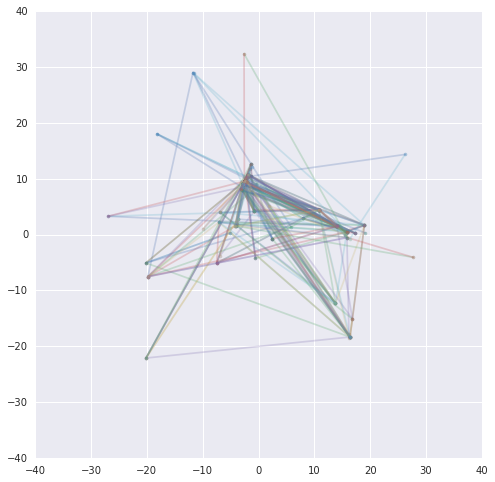

In [127]:
import time, sys
from IPython.core.display import clear_output,display
f, ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xlim(-40,40)
ax.set_ylim(-40,40)


#for i in range(1,len(joined)):
joined = joined.drop_duplicates('block')
for row in np.array(pd.concat([joined.shift(1)[[0,1]],joined[[0,1]]],axis=1))[1:]:
    ax.plot(row[[0,2]],row[[1,3]],alpha=0.25,marker='.')
    #time.sleep(0.0001)
    clear_output(wait=True)
    display(f)
plt.close()

In [126]:
joined.drop_duplicates('block')

,artist_id,ts,td,artist_idx,features,dist,session,patch_idx_shuffle,patch_idx_simple,block,0,1
0,810,2008-03-29 20:12:38,-9.223372e+09,1112.0,"[2.15221003274e-06, 0.00210297822824, 4.483770...",NaN,0,0,0,0,-2.149121,10.358557
6,1224,2008-03-29 20:38:46,4.810000e+02,209.0,"[1.13268865377e-07, 0.00238120604927, 1.132688...",0.574284,0,1,1,1,10.835499,4.443206
8,38199,2008-03-29 20:45:48,1.750000e+02,2013.0,"[8.06992688485e-07, 3.87356490473e-06, 0.00285...",0.823286,0,1,2,2,-7.484912,-5.100566
9,502,2008-03-29 20:51:03,3.150000e+02,148.0,"[2.16078255918e-06, 0.0082165844964, 3.1830687...",0.738444,0,1,3,3,14.061989,1.492042
10,10032,2008-03-29 20:54:28,2.050000e+02,1359.0,"[5.33510714976e-07, 8.7709161542e-05, 5.335107...",0.545641,0,2,4,4,-2.866274,9.034948
16,10382808,2008-03-29 21:15:17,1.800000e+02,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,0,3,5,5,NaN,NaN
17,14309,2008-03-29 21:16:49,9.200000e+01,2012.0,"[8.08611910918e-07, 0.000157517600247, 0.03240...",NaN,0,4,6,6,2.470587,-0.741374
23,650,2008-03-30 14:30:59,6.134800e+04,204.0,"[0.0016467504466, 0.0112492459759, 1.115956769...",0.997677,1,5,7,7,-2.483858,9.524995
26,1224,2008-03-30 14:43:58,3.230000e+02,209.0,"[1.13268865377e-07, 0.00238120604927, 1.132688...",0.569504,1,6,8,8,10.835499,4.443206
32,14258,2008-03-30 15:07:47,2.910000e+02,3757.0,"[0.00465284764516, 1.60001638417e-06, 9.888101...",0.431514,1,7,9,9,-2.872202,7.915643


In [119]:
df[['artist_idx','ts']]

,artist_id,ts,td,artist_idx,features,dist,session,patch_idx_shuffle,patch_idx_simple,block
0,810,2008-03-29 20:12:38,-9.223372e+09,1112.0,"[2.15221003274e-06, 0.00210297822824, 4.483770...",NaN,0,0,0,0
1,810,2008-03-29 20:16:19,2.210000e+02,1112.0,"[2.15221003274e-06, 0.00210297822824, 4.483770...",0.0,0,0,0,0
2,810,2008-03-29 20:19:49,2.100000e+02,1112.0,"[2.15221003274e-06, 0.00210297822824, 4.483770...",0.0,0,0,0,0
3,810,2008-03-29 20:23:21,2.120000e+02,1112.0,"[2.15221003274e-06, 0.00210297822824, 4.483770...",0.0,0,0,0,0
4,810,2008-03-29 20:27:42,2.610000e+02,1112.0,"[2.15221003274e-06, 0.00210297822824, 4.483770...",0.0,0,0,0,0
